In [2]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.neural_network import MLPRegressor
import numpy as np

In [3]:
# In the csv file, columns are separated with ";"
df = pd.read_csv(f"ua_passengers_1995-2020.csv",delimiter=";")

In [4]:
df.head()

,year,railway,sea,river,auto_bus,air,tram,trolley,subway
0,1995,577431.5,7817.0,3594.1,3483173.0,1914.9,821652.3,1358736.9,561012.4
1,1996,538568.7,5044.6,2735.9,3304600.0,1724.0,788026.2,1590439.3,536304.1
2,1997,500838.8,4311.3,2443.1,2512147.2,1484.5,1265349.2,2388087.6,507897.0
3,1998,501428.7,3838.3,2356.5,2403424.6,1163.9,1450735.2,2717998.1,668456.4
4,1999,486810.4,3084.3,2269.4,2501707.5,1087.0,1456755.4,2735241.0,724425.5


In [5]:
# Converts the DataFrame from wide format to long format (unpivoting).
dff = pd.melt(frame=df,id_vars="year",value_vars=df.drop("year",axis=1).columns)
dff

,year,variable,value
0,1995,railway,577431.5
1,1996,railway,538568.7
2,1997,railway,500838.8
3,1998,railway,501428.7
4,1999,railway,486810.4
...,...,...,...
203,2016,subway,698367.3
204,2017,subway,718886.9
205,2018,subway,726585.1
206,2019,subway,714982.1


<Axes: xlabel='year', ylabel='value'>

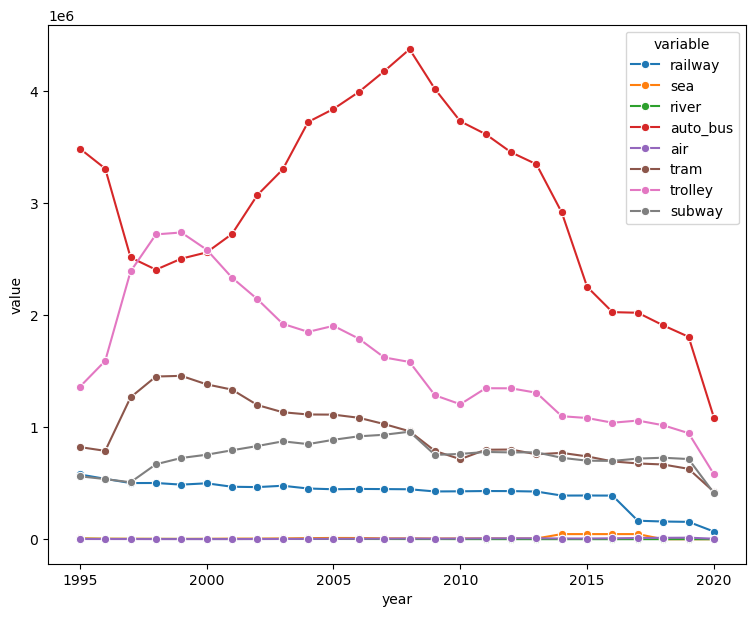

In [6]:
# Change in the number of uses of all means of transportation by year (trend chart)
plt.figure(figsize=(9,7))
sns.lineplot(df,x=dff["year"],y=dff["value"],hue=dff["variable"],marker="o")

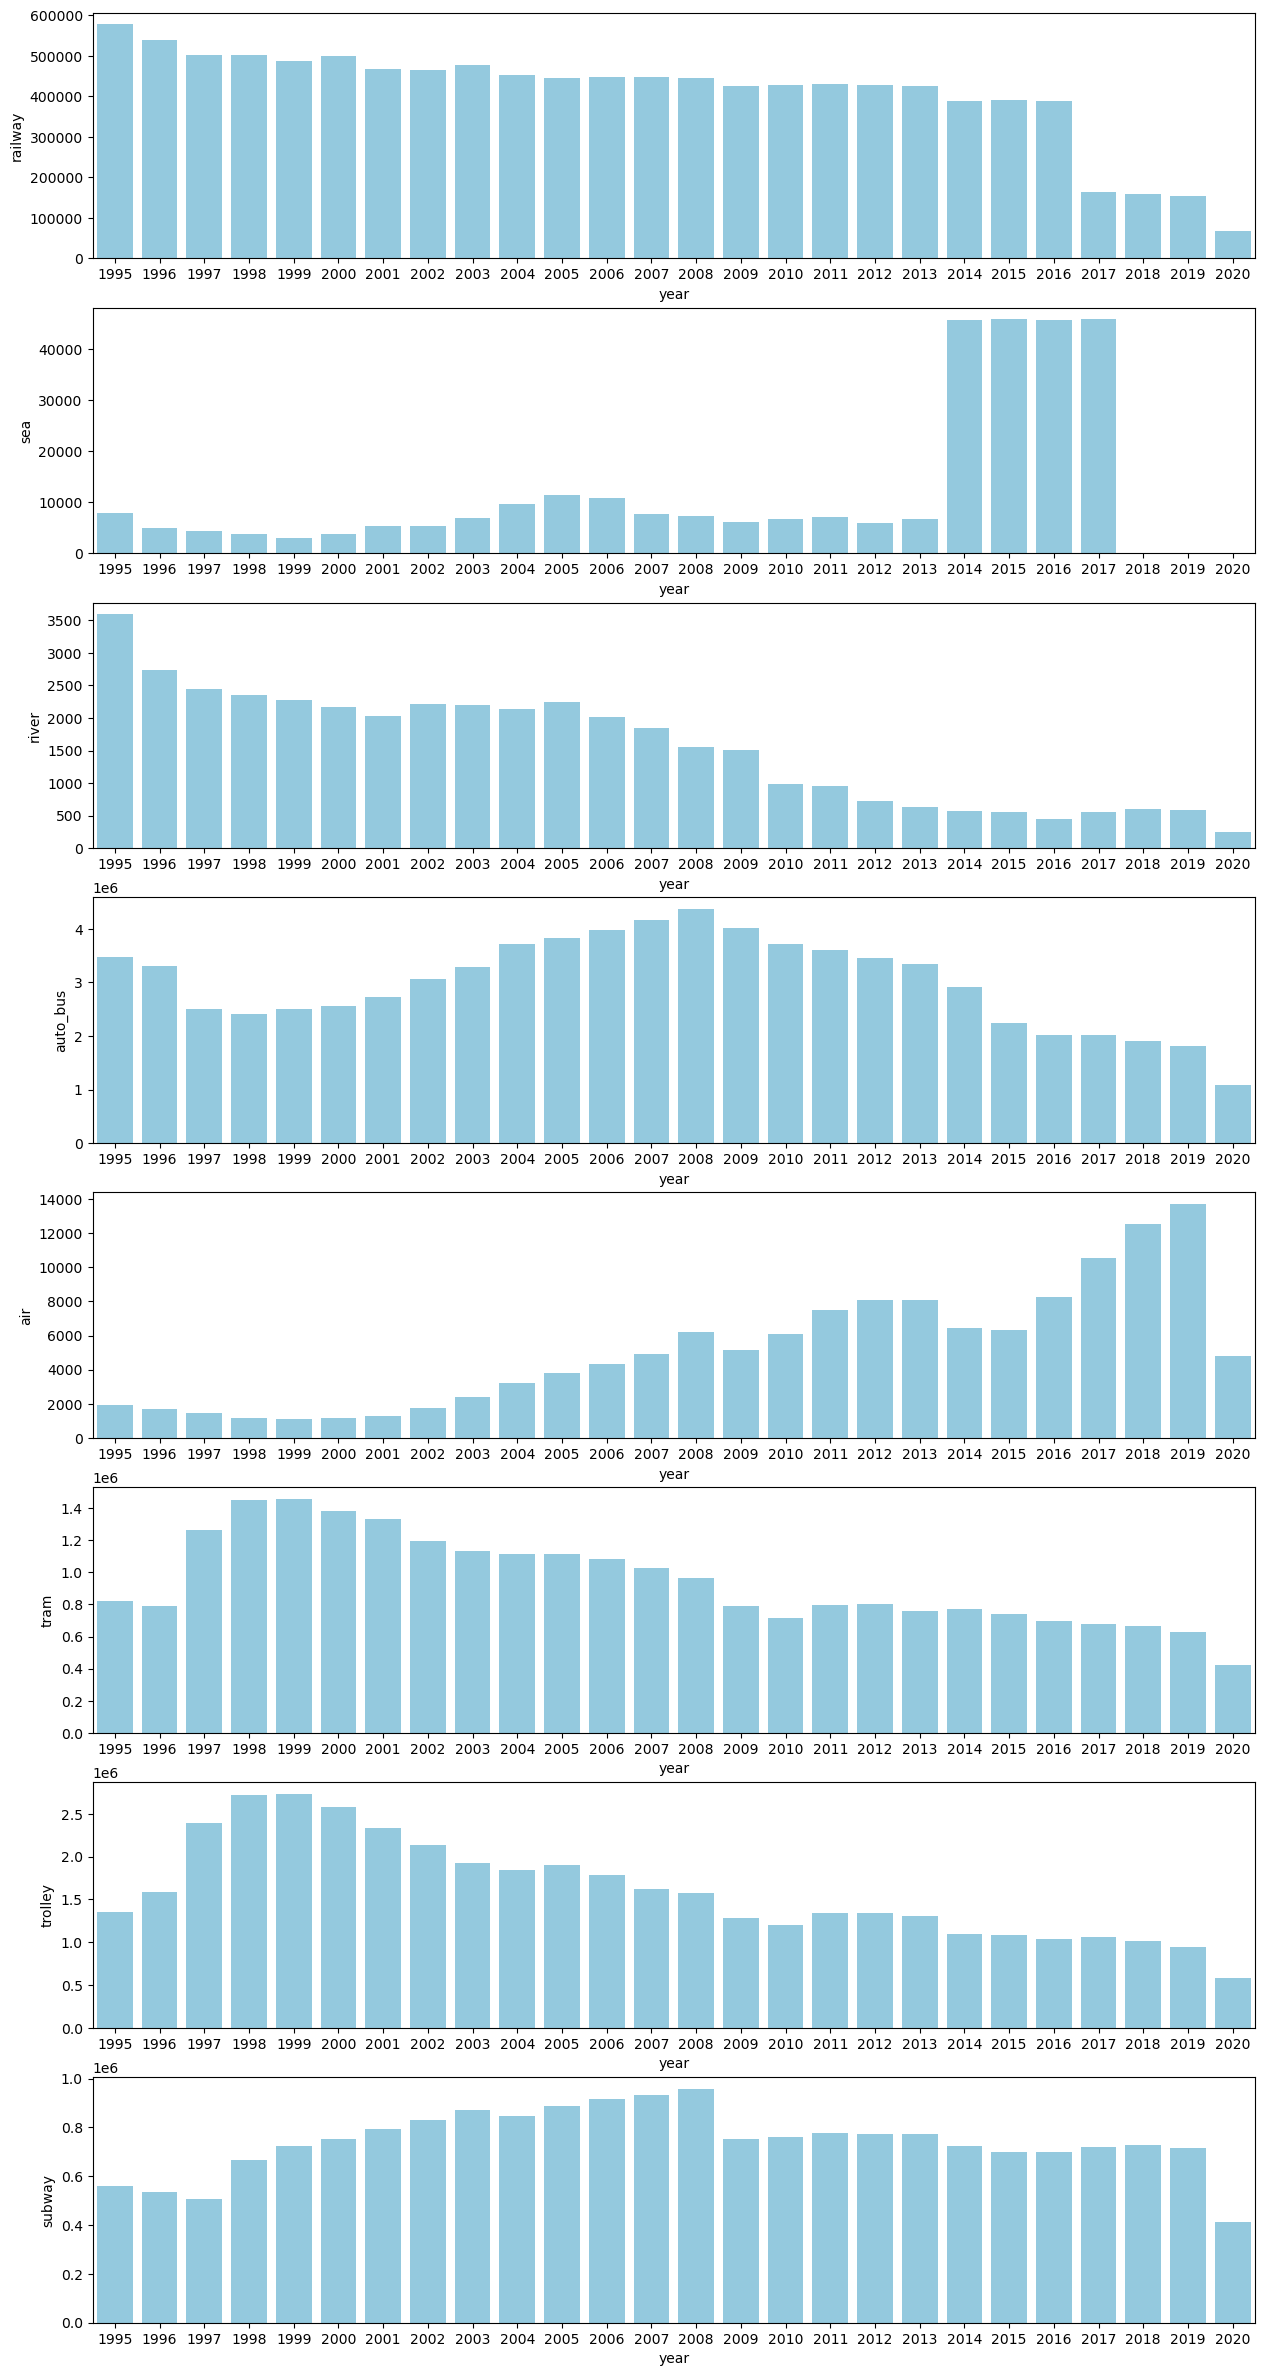

In [7]:
# Change in the number of uses of all means of transportation by year (bar chart)
fig,ax = plt.subplots(8,1,figsize=(15,30))
for i,ax in zip(df.drop("year",axis=1).columns, ax.flatten()):
            sns.barplot(df,ax=ax,x=df["year"],y=df[i],color="skyblue")

In [8]:
# The year column is used as an index 
dff = df.set_index("year")
list(dff.columns)

['railway', 'sea', 'river', 'auto_bus', 'air', 'tram', 'trolley', 'subway']

In [9]:
# It is chosen as the most used means of transportation every year
max_transport = dff.idxmax(axis=1)

In [10]:
# It shows how much each vehicle was used in which year
values = dff.max(axis=1)

In [11]:
# It gives the most used vehicle type and number of uses by year
years = []
uses = []
nou = []

for type,value,year in zip(max_transport,values,dff.index):
    years.append(year)
    uses.append(type)
    nou.append(value)
mupt = pd.DataFrame({"Year":years,"Max Used Public Transport":uses,"Number of Uses":nou})
print(mupt)
    

    Year Max Used Public Transport  Number of Uses
0   1995                  auto_bus       3483173.0
1   1996                  auto_bus       3304600.0
2   1997                  auto_bus       2512147.2
3   1998                   trolley       2717998.1
4   1999                   trolley       2735241.0
5   2000                   trolley       2581880.0
6   2001                  auto_bus       2722001.6
7   2002                  auto_bus       3069136.3
8   2003                  auto_bus       3297504.5
9   2004                  auto_bus       3720326.4
10  2005                  auto_bus       3836514.5
11  2006                  auto_bus       3987982.0
12  2007                  auto_bus       4173033.7
13  2008                  auto_bus       4369125.5
14  2009                  auto_bus       4014035.2
15  2010                  auto_bus       3726288.6
16  2011                  auto_bus       3611829.9
17  2012                  auto_bus       3450173.1
18  2013                  auto_

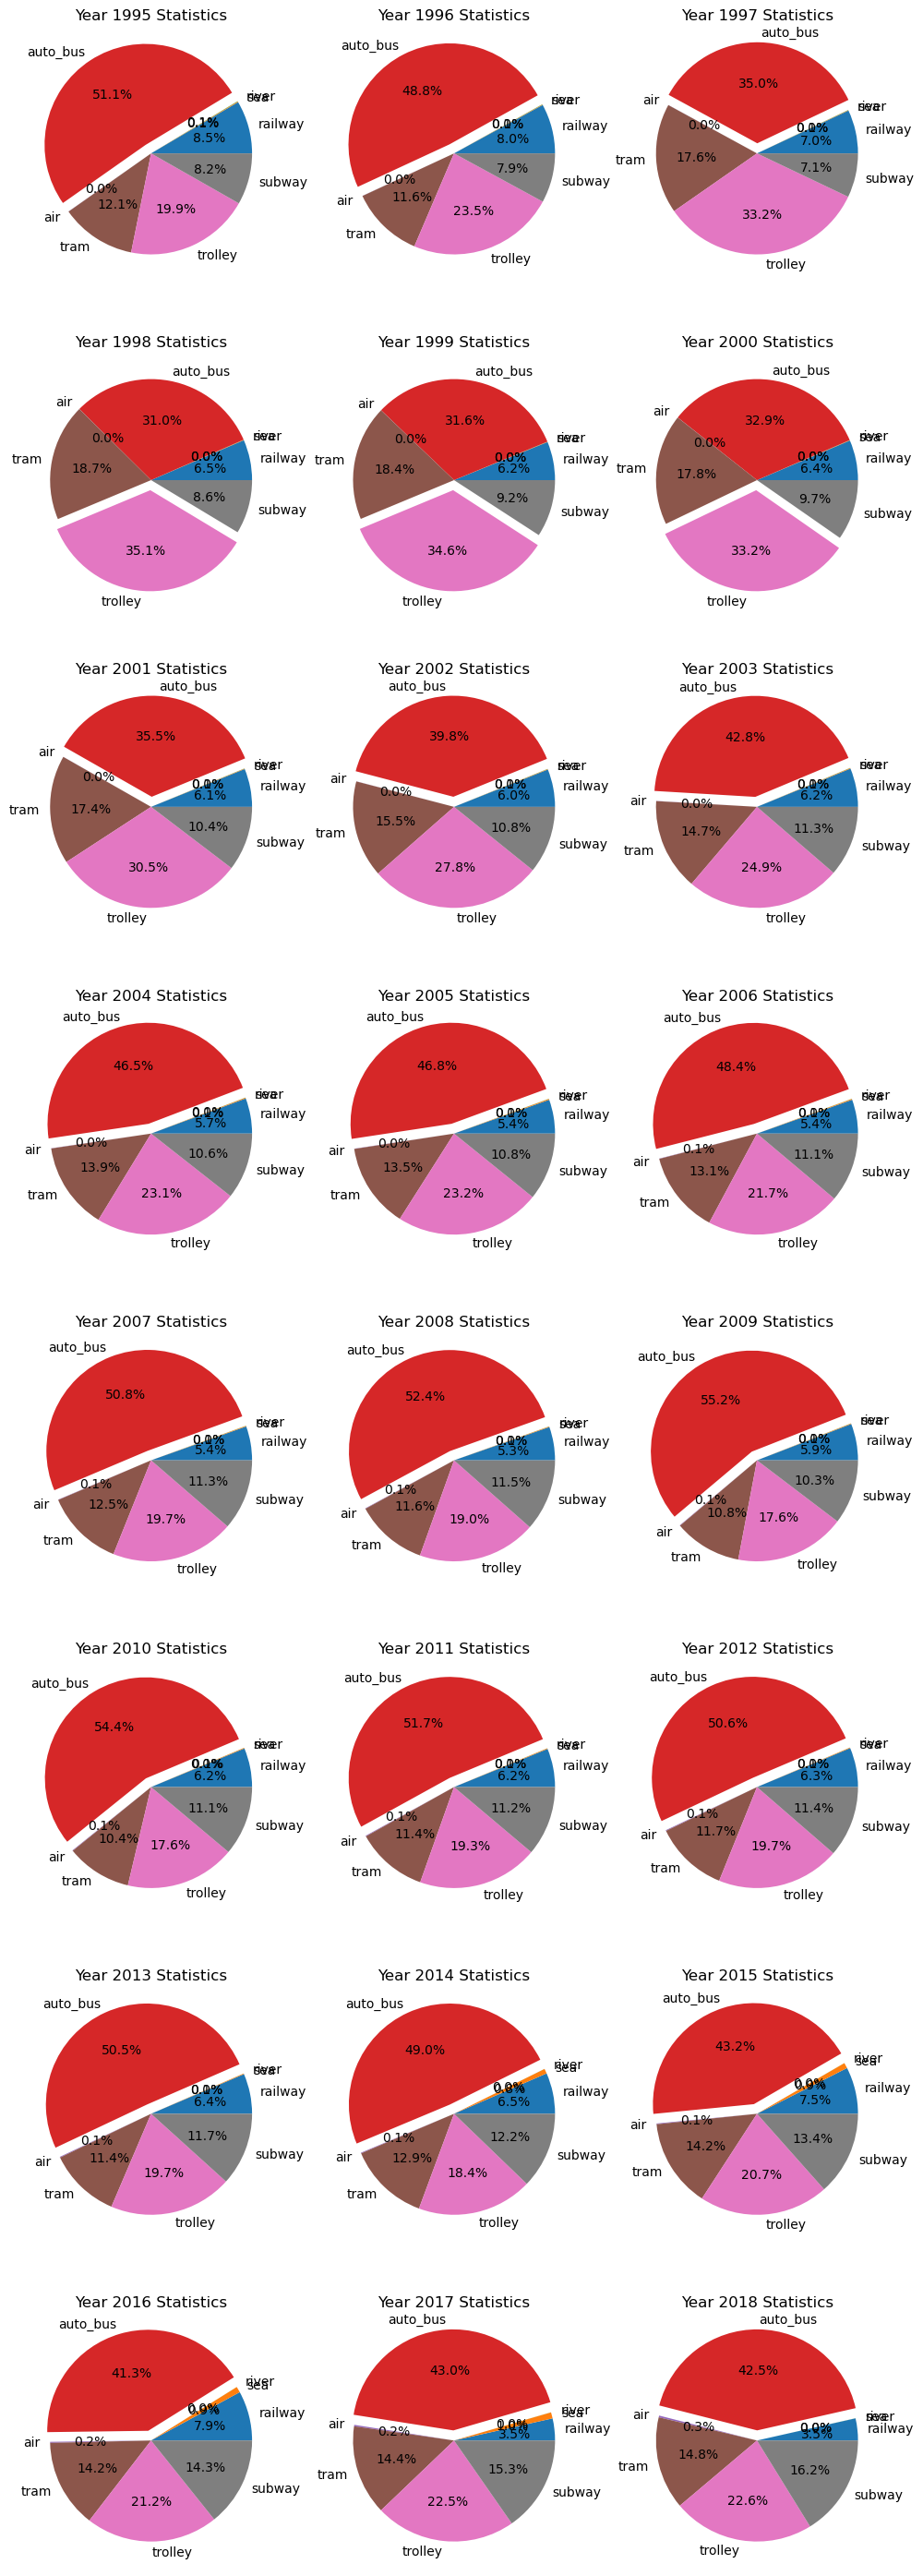

In [12]:
# Usage rates of public transport vehicle types by year (pie chart)
fig,axes = plt.subplots(8,3,figsize=(12,36))
explode = {}
for i in dff.columns:
        explode[i] = 0
for i,ax in zip(dff.index,axes.flatten()):
        explode[dff.loc[i].idxmax()] = 0.1
        ax.pie(x=dff.loc[i],labels=dff.columns,autopct="%1.1f%%",explode=list(explode.values()))
        ax.set_title(f"Year {i} Statistics")
        explode[dff.loc[i].idxmax()] = 0
        
    
    

In [13]:
# Total annual usage of transportation vehicles
df["sum"] = df.drop("year",axis=1).sum(axis=1)

In [14]:
# Dummy variable for intercept shift and Dummy variable for trend change
df["2014_indicator"] = np.where(df["year"]>=2014,1,0)
df["trend_change"] = df["2014_indicator"] * (df["year"]-2014)

In [15]:
x = df[["year","2014_indicator","trend_change"]]
y = df[["auto_bus"]]
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=2)
lm = LinearRegression()

In [16]:
model = lm.fit(x_train,y_train)

In [17]:
y_pred = model.predict(x_test)

In [18]:
# Linear Regression r2_score
r2_score(y_pred=y_pred,y_true=y_test)

0.6107176969971027

In [19]:
# Artifical Neural Network regression
model = MLPRegressor()
model.fit(x_train,y_train)

c:\Users\sakib\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\sakib\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor()

In [20]:
# Artifical Neural network learning score
model.score(x_train,y_train)

-12.371371461515446

In [21]:
# Artifiacl Neural Network r2_score
model.score(x_train,y_train)
y_pred = model.predict(x_test)
r2_score(y_pred=y_pred,y_true=y_test)

-14.997676477111657

In [22]:
# OLS regression
model = sm.OLS(y, x).fit()

In [23]:
# Summary table
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               auto_bus   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              279.5
Date:                Tue, 28 Oct 2025   Prob (F-statistic):                    3.13e-18
Time:                        17:24:50   Log-Likelihood:                         -378.55
No. Observations:                  26   AIC:                                      763.1
Df Residuals:                      23   BIC:                                      766.9
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
year            1683.5330     61.983     27.161      0.000    1555.312    1811.754
2014_indicator  -6.94e+05   3.89e+05     -1.782      0.088    -1.5e+06    1.12e+05
trend_change   -2.337e+05   1.02e+05     -2.284      0.032   -4.45e+05   -2.21e+04
==============================================================================
Omnibus:                        0.448   Durbin-Watson:                   0.298
Prob(Omnibus):                  0.799   Jarque-Bera (JB):                0.574
Skew:                          -0.237   Prob(JB):                        0.750
Kurtosis:                       2.448   Cond. No.                     7.52e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""